# **Facial Emotion Detector with Convolutional Neural Networks**

## Importing Necessary Modules and Libraries


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping


## Loading the dataset and preprocessing the FER dataset with images

In [2]:

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescaling for validation and test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    "C:/Users/phgtk/Downloads/FER/train",
    target_size=(48, 48),
    batch_size=64,
    class_mode='categorical'
)

# Load validation data
validation_generator = test_datagen.flow_from_directory(
    "C:/Users/phgtk/Downloads/FER/test",
    target_size=(48, 48),
    batch_size=64,
    class_mode='categorical'
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


# **Creating and Training our Model**

In [3]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))  # 7 classes for the 7 emotions

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()


C:\Users\phgtk\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,423 (1.36 MB)

 Trainable params: 356,423 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

# **Fitting Our Model**

In [5]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10,callbacks=[early_stop]
)

Epoch 1/10


C:\Users\phgtk\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 401s 877ms/step - accuracy: 0.2394 - loss: 1.8375 - val_accuracy: 0.2567 - val_loss: 1.7796
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - accuracy: 0.2188 - loss: 1.8356 - val_accuracy: 0.2000 - val_loss: 1.7402
Epoch 3/10


C:\Users\phgtk\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


448/448 ━━━━━━━━━━━━━━━━━━━━ 86s 189ms/step - accuracy: 0.2550 - loss: 1.7848 - val_accuracy: 0.2920 - val_loss: 1.7337
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 81us/step - accuracy: 0.2031 - loss: 1.7304 - val_accuracy: 0.2000 - val_loss: 1.7435
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 169s 375ms/step - accuracy: 0.2751 - loss: 1.7541 - val_accuracy: 0.3131 - val_loss: 1.6581
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 76us/step - accuracy: 0.2188 - loss: 1.7647 - val_accuracy: 0.4000 - val_loss: 1.7189
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 78s 171ms/step - accuracy: 0.2996 - loss: 1.7271 - val_accuracy: 0.3797 - val_loss: 1.5604
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 61us/step - accuracy: 0.3125 - loss: 1.6161 - val_accuracy: 0.2000 - val_loss: 1.6713
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 78s 172ms/step - accuracy: 0.3374 - loss: 1.6581 - val_accuracy: 0.4397 - val_loss: 1.4635
Epoch 10/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 55us/step - accuracy: 0.3906 - loss: 1.5430 - val_accur

# **Plotting and Monitoring Losses during Training**

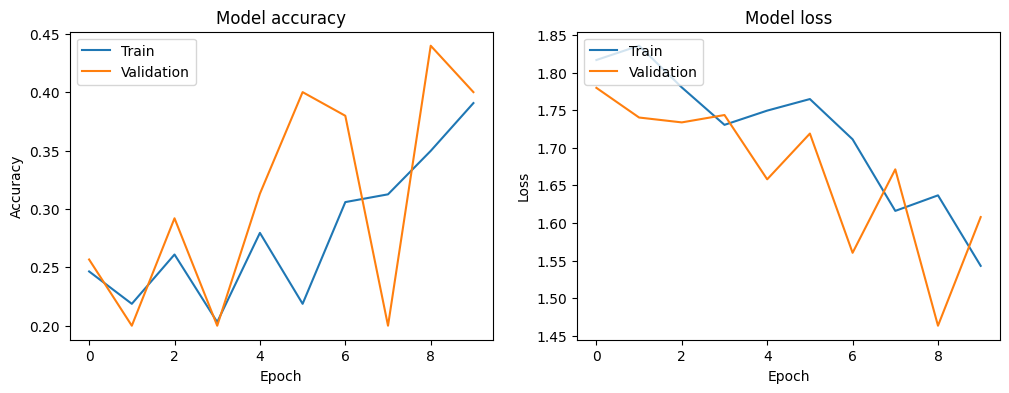

In [6]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


# **Model Evaluation**

In [14]:
import numpy as np
from tensorflow.keras.preprocessing import image

img = image.load_img("D:/Photos Backup/Mygallery2023-24/itgirlpics/Instagram/IMG_20240607_134841_784.jpg", target_size=(48, 48))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Predict the emotion
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
print(f"Predicted emotion: {emotion_labels[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted emotion: Sad


# **Defining a function to easily take image input and give out predicted emotion label**

In [21]:
def imagereaction(path):
    img = image.load_img(path, target_size=(48, 48))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    print(f"Predicted emotion: {emotion_labels[predicted_class]}")
    

In [33]:
imagereaction("D:/Photos Backup/Mygallery2023-24/Camera/IMG20230506222817.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted emotion: Surprise
